In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
from matplotlib import rc
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import glob, re
import pyswarms as ps

import scienceplots

plt.style.use('default')
plt.style.use(['science', "ieee" ,'high-vis'])

In [3]:
def f_cost(x, y):
    r_0 = 0, 0
    r_1 = 1, 1
    f = 0
    f += -2.0 * np.exp(-2.0 * ((x - r_0[0])**2 + (y - r_0[1])**2))
    f += -np.exp(-4.0 * ((x - r_1[0])**2 + (y - r_1[1])**2))
    return f

def f_cost2(x):
    r_0 = np.array([0, 0])
    r_1 = np.array([1, 1])
    f = 0
    f += -2.0 * np.exp(-2.0 * np.sum((x - r_0)**2))
    f += -np.exp(-4.0 * np.sum((x - r_1)**2))
    return f


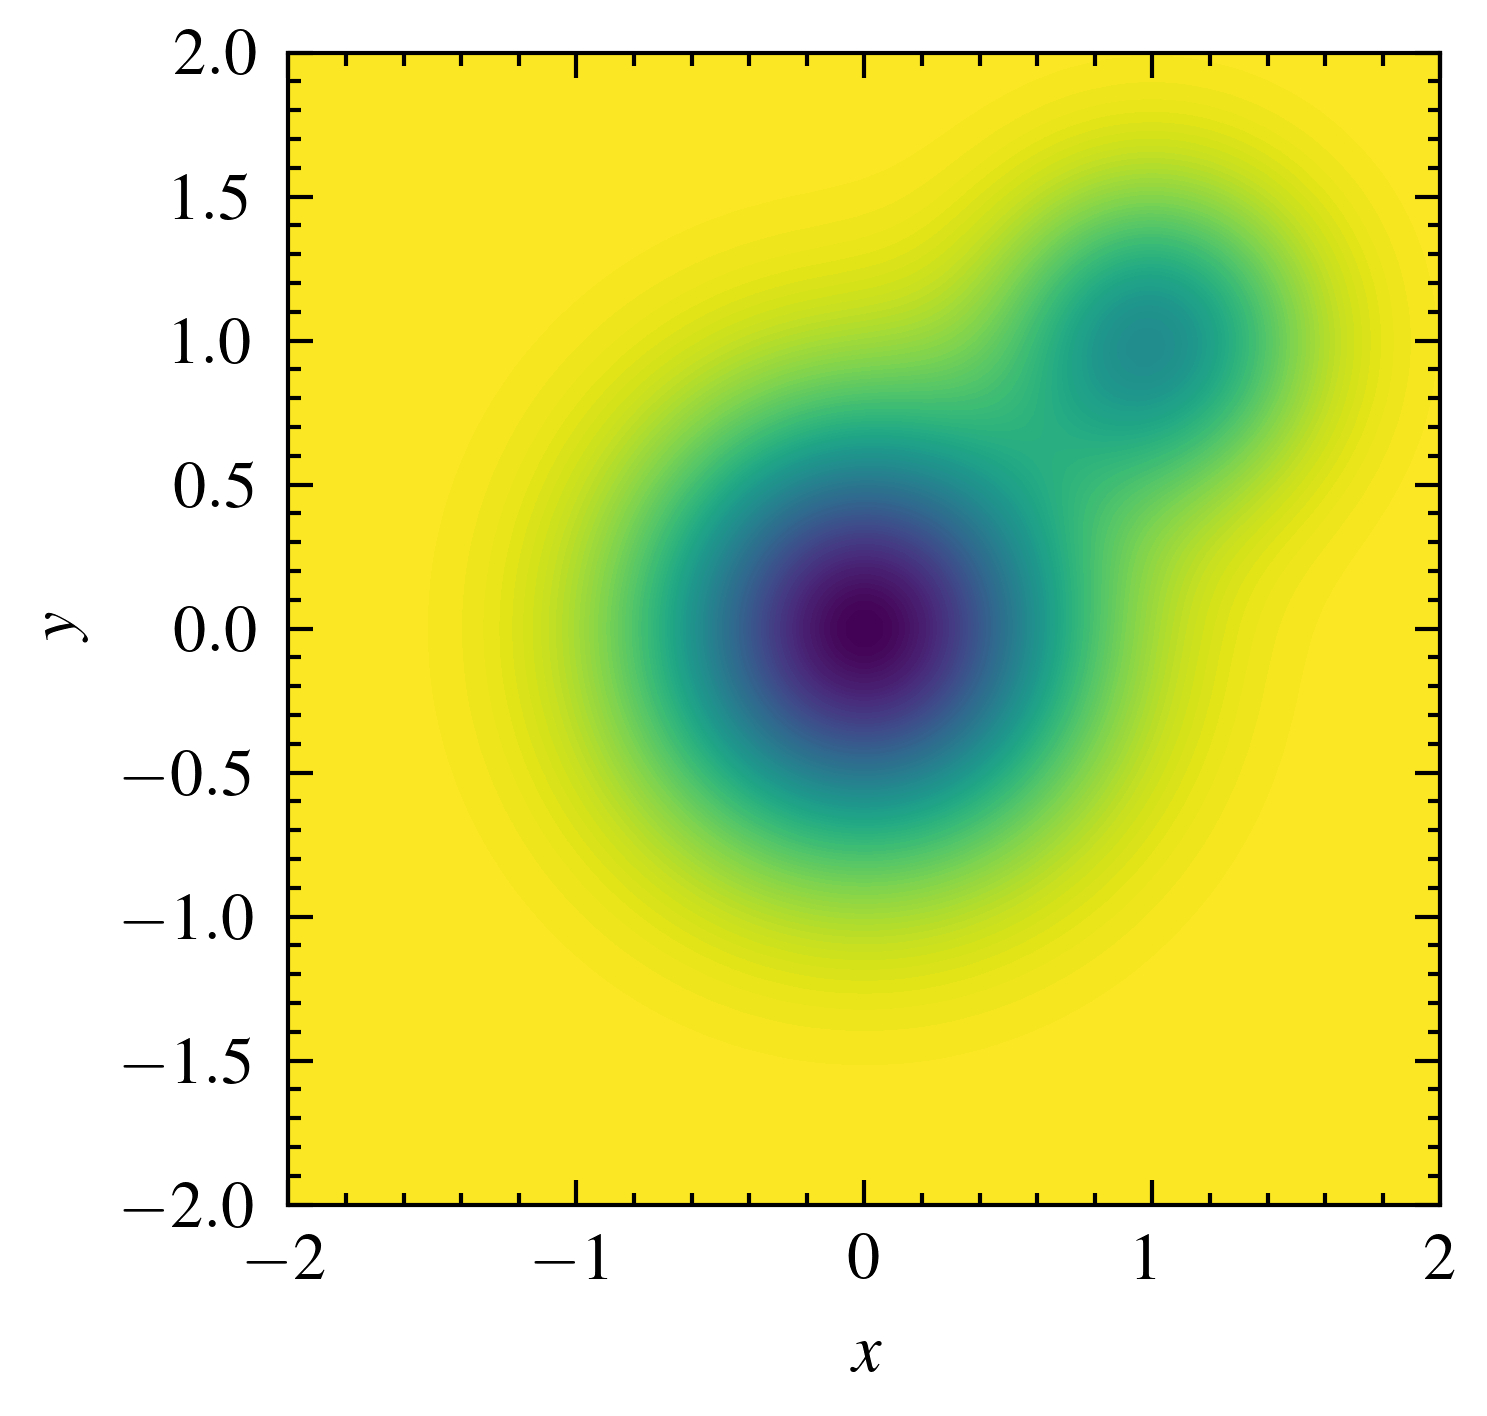

In [4]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f_cost(X, Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z, 100, cmap='viridis')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.tight_layout()


In [5]:
%matplotlib qt
# 3D surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)

Points = np.random.rand(10, 2) * 4 - 2
ax.scatter(Points[:, 0], Points[:, 1], f_cost(Points[:, 0], Points[:, 1]), c='k', marker='.', s=5)

In [6]:
# Particle swarm optimization

def f_cost(X):
    return f_cost2(X)

# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f_cost2, iters=100)

# Plot the results with surface plot

fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)
ax.scatter(pos[0], pos[1], f_cost2(pos), c='k', marker='.', s=5)




2023-03-13 23:09:23,562 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.296 
2023-03-13 23:09:23,673 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.29582587296821095, best pos: [0.96386581 0.74634195]


In [7]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

In [8]:
plot_cost_history(cost_history=optimizer.cost_history)

<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

In [9]:
len(optimizer.pos_history)
optimizer.pos_history[0].T

array([[0.62556184, 0.30688774, 0.27709506, 0.11199024, 0.91007095,
        0.52006517, 0.62391286, 0.88715615, 0.74005251, 0.32212951],
       [0.66461706, 0.18134197, 0.31709604, 0.15924207, 0.6021776 ,
        0.73814425, 0.41288885, 0.75008013, 0.31936124, 0.03773844]])

In [10]:
Xpart = [optimizer.pos_history[i].T[0] for i in range(len(optimizer.pos_history))]
Ypart = [optimizer.pos_history[i].T[1] for i in range(len(optimizer.pos_history))]
Zpart = []
for i in range(len(Xpart)):
    Zpart.append([])
    for j in range(len(Xpart[i])):
        Zpart[i].append(f_cost(np.array([Xpart[i][j], Ypart[i][j]])))

print(Xpart[0])
print(Ypart[0])
print(Zpart[0])

[0.62556184 0.30688774 0.27709506 0.11199024 0.91007095 0.52006517
 0.62391286 0.88715615 0.74005251 0.32212951]
[0.66461706 0.18134197 0.31709604 0.15924207 0.6021776  0.73814425
 0.41288885 0.75008013 0.31936124 0.03773844]
[-0.7419188835701964, -1.5612094650964816, -1.4219627576762357, -1.8565281589732636, -0.6988559322252577, -0.6941200227800024, -0.7959427440576032, -0.874745304569263, -0.6650523150148665, -1.624466710806958]


In [ ]:
%matplotlib notebook

plt.style.use('default')
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)

scat = 

2023-03-13 23:18:42,423 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-03-13 23:18:42,425 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 512x384 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -vcodec libx264 -y basic_animation.mp4


Frame 0 / 360

TypeError: 'tuple' object is not callable

Frame 10 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 21 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 20 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 22 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 4 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 2 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 28 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 11 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 5 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 1 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 17 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 12 / 360

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Frame 11 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 6 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 21 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 22 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 1 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 27 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 1 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 22 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 8 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 23 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 24 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable


Frame 7 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 8 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 9 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 22 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 19 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 0 / 3600

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a

Frame 18 / 360

Traceback (most recent call last):
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1406, in _step
    still_going = super()._step(*args)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1105, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1124, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/remi/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1718, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_32241/2667375643.py", line 16, in animate
    scat._offsets3d(Xpart[i], Ypart[i], Zpart[i])
TypeError: 'tuple' object is not callable
Traceback (most recent call last):
  File "/home/remi/a